# HSLU FS18 - IPCV: Bürgler Exercise II - Filter (2)
##### Student: Adrian Kauz  
***

### Imports

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Matplot-Params

In [12]:
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi']= 150

## Some helper functions

In [13]:
def convolveSeparatedFilters(newArrayM1, newArrayM2):
    arrayHorizontal = newArrayM1
    arrayVertikal = newArrayM2
    
    result = arrayVertikal * arrayHorizontal[0]
    
    for x in range(1, arrayHorizontal.shape[0]):
        result = np.append(result, arrayVertikal * arrayHorizontal[x], axis = 1)
        
    return result

# Aufgabe 1: Separierbare Filter

Zeigen Sie, dass der Mittelwertfilter x-/y-separierbar ist, wobei
\begin{align*}
  M_1 = \frac{1}{3}\begin{bmatrix}1 & 1 & 1\end{bmatrix}\qquad&\mathrm{und}\qquad
  M_2 = \frac{1}{3}\begin{bmatrix}1\\ 1\\ 1\end{bmatrix}
\end{align*}
d.h. bilden Sie $M_1 \star M_2$ und vergleichen Sie mit dem
$3\times 3$-Mittelwert-Kernel. Dabei müssen Sie die beiden
Kernels $M_1$ und $M_2$ in beliebiger Reihenfolge falten (es
gilt ja das Kommutativgesetz, d.h. die Reihenfolge hat keinen
Einfluss auf das Resultat).

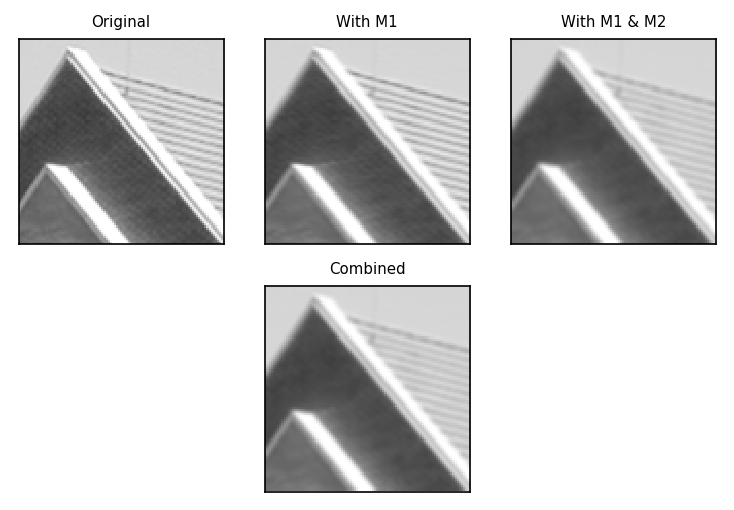

In [14]:
img = cv2.imread("images/house.png")
croppedImg = img[200:300,200:300]

m1 = np.ones((1,3)) * (1/3)
m2 = np.ones((3,1)) * (1/3)

# Filtering House
filteredImage1 = cv2.filter2D(croppedImg, -1, m1)
filteredImage2 = cv2.filter2D(filteredImage1, -1, m2)
filteredCompined = cv2.filter2D(filteredImage1, -1, convolveSeparatedFilters(m1, m2))

# Plot
plt.subplot(2, 3, 1), plt.imshow(croppedImg), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(filteredImage1), plt.title('With M1'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(filteredImage2), plt.title('With M1 & M2'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(filteredImage2), plt.title('Combined'), plt.xticks([]), plt.yticks([])
plt.show()

# Aufgabe 2: Der Medianfilter ist Shiftinvariant

Für ein 1D-Signal bedeutet Shiftinvarianz des Filters $f$
folgendes. Falls $y_1[n] = f(x_1[n])$, dann gilt
$y_2[n]=f(x_1[n-k])=y_1[n-k]$. 
In Worten: Falls $y_1$ der Output des Filters von $x_1$ ist, dann ist das um $k$ Stellen verschobene $y_1$ der Output des um $k$ Stellen verschobenen $x_1$.

Wir zeigen am Beispiel der Inputfolge $x_1[n]=[\mathbf{4},2,3,1,5,9]$, dass der 1D Medianfilter $w$ der 
Länge $3$ shiftinvariant ist. Wir nehmen $0$-padding an und erhalten
\begin{align*}
  y_1[n] &= f(x_1[n]) \;=\; (w\star x_1)[n] \;=\; [0,\mathbf{2},3,2,3,5,5,0]
\end{align*}  
Nun betrachten wir die um $2$ Stellen nach rechts verschobene
Inputfolge $x_2[n]=x_1[n-2]=[0,0,4,2,3,1,5,9]$ und erhalten

\begin{align*}
  y_2[n] &= f(x_2[n]) \;=\; (w\star x_2)[n] \;=\; [\mathbf{0},0,2,3,2,3,5,5,0]
\end{align*}  
Wir haben das Sample im Ursprung mit fetten Zeichen dargestellt
und sehen nun, dass $y_2[n]=y_1[n-2]$, dass also die zweite
Outputfolge nichts anderes ist als die erste Outputfolge wenn diese
um zwei Stellen nach rechts geshiftet wird.

Man kann dies einfach auf den 2D-Fall eines Bildes erweitern.
Lesen Sie das Bild des Kamearmannes ein und padden Sie das Bild mit Nullen.

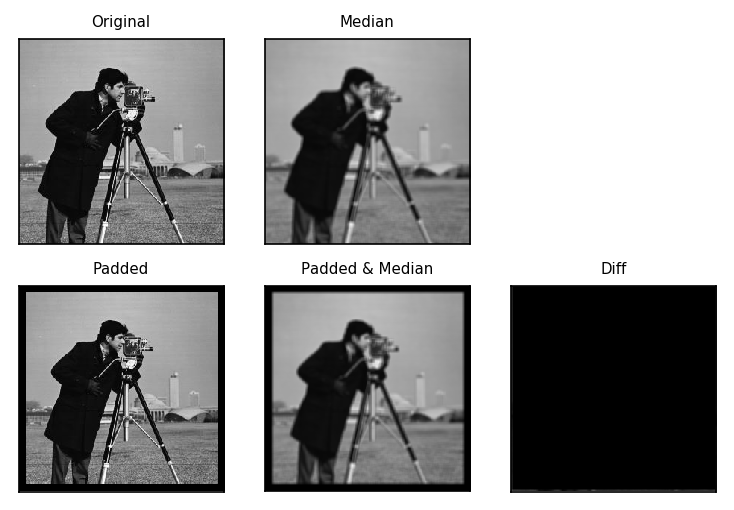

In [15]:
# Load image (256x256)
img = cv2.imread("images/cameraman.png")

# Add border and fill with zeroes. Here with the color 'black'
borderSize = 10
paddedImage = cv2.copyMakeBorder(img, top=borderSize, bottom=borderSize, left=borderSize, right=borderSize, borderType= cv2.BORDER_CONSTANT, value=[0,0,0] )

# Generate Median-Kernel
dimension = 5
kernel = np.ones((dimension, dimension)) * (1 / (dimension * dimension))

# Filtering image
filteredImage = cv2.filter2D(img, -1, kernel)
filteredPaddedImage = cv2.filter2D(paddedImage, -1, kernel)

# Median-Result-Difference between the original and the padded image
diff = cv2.absdiff(filteredImage, filteredPaddedImage[borderSize:256 + borderSize,borderSize:256 + borderSize])

plt.subplot(2, 3, 1), plt.imshow(img), plt.set_cmap('gray'), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(filteredImage), plt.set_cmap('gray'), plt.title('Median'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(paddedImage), plt.set_cmap('gray'), plt.title('Padded'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(filteredPaddedImage), plt.set_cmap('gray'), plt.title('Padded & Median'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 6), plt.imshow(diff), plt.set_cmap('gray'), plt.title('Diff'), plt.xticks([]), plt.yticks([])
plt.show()

Erkenntniss: Der Kern des Bildes wird identisch gefiltert. Das originale und das gepaddete Bild unterscheiden sich höchsten für ein paar Pixel am Rand (Diff). Unterschied macht sich erst bei grösserem Kernel bemerkbar.

# Aufgabe 3: Laplace-Filter

Schärfen Sie das Bild lena.tif (auf ILIAS) mit Hilfe des Laplace-Filters. Diese Operation wird heutzutage auf
den meisten modernen Kameras automatisch durchgeführt.

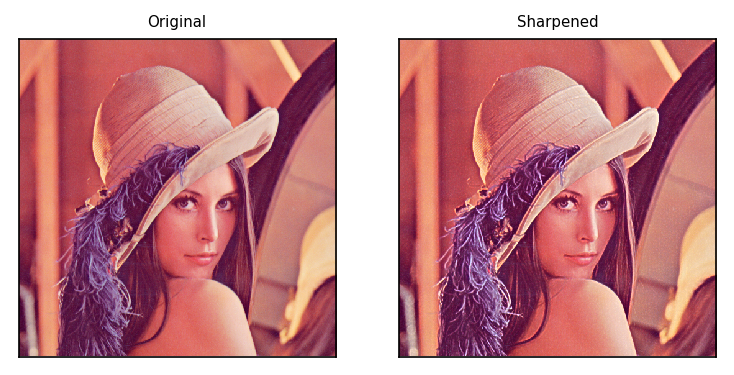

In [16]:
# Load image (512x512)
img = cv2.imread("images/lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Generating Kernels
laplaceKernel1 = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])
factor = 1
laplaceKernel2 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]) * factor
kernelsize = 3
blurKernel = np.ones((kernelsize, kernelsize)) * (1 / (kernelsize**2))


# Filtering image. Separate V-Channel, add a little blur, use laplace kernel and sharpen V-Channel
v = img[:,:,2]
v = cv2.filter2D(v, -1, blurKernel)
v = cv2.filter2D(v, -1, laplaceKernel2)
v = cv2.add(img[:,:,2], v)

# Combine the channels together
sharpenedImage = cv2.merge([img[:,:,0], img[:,:,1], v])

plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(sharpenedImage, cv2.COLOR_HSV2RGB)), plt.title('Sharpened'), plt.xticks([]), plt.yticks([])
plt.show()

# Aufgabe 4: Betrag des Gradienten

Führen Sie mit dem Bild Zebra.png die gleichen Operationen durch wie in der nachfolgenden Bildserie gezeigt:  
![zebra_examples.jpg](images/zebra_examples.jpg)

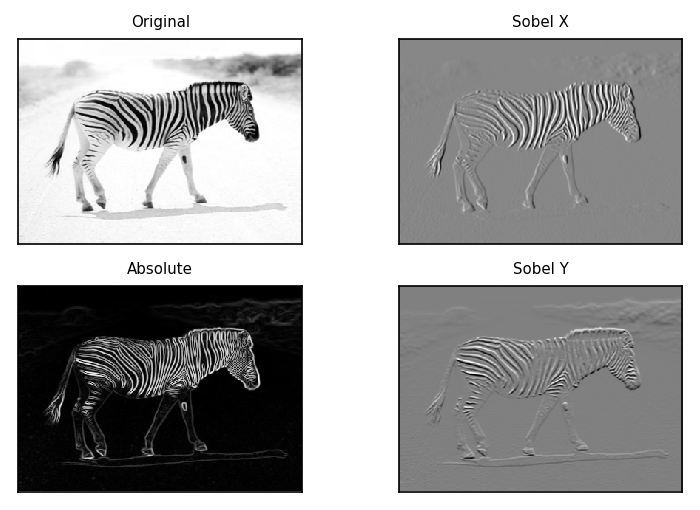

In [17]:
# Load zebra image (384x279)
img = cv2.imread("images/zebra.png")
img = img[:,:,0]

# Define sobel kernel
sobelKernelX = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobelKernelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Convolve kernels with image
imgSobelX = cv2.filter2D(img, cv2.CV_32F, sobelKernelX)
imgSobelY = cv2.filter2D(img, cv2.CV_32F, sobelKernelY)

absoluteGradient = np.sqrt(np.square(imgSobelX) + np.square(imgSobelY))

# Plot images
plt.subplot(2, 2, 1), plt.imshow(img), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(imgSobelX), plt.set_cmap('gray'), plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(absoluteGradient), plt.set_cmap('gray'), plt.title('Absolute'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(imgSobelY), plt.set_cmap('gray'), plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Aufgabe 5: Gauss- und Laplacepyramide

Erstellen Sie vom Bild der Lena die Gauss- und die Laplacepyramide.

### cv2.pyrDown()  
***
"The function performs the downsampling step of the Gaussian pyramid construction. First, it convolves the source image with the kernel: 

\begin{align*}\frac{1}{256}  \begin{bmatrix}
1 & 4 & 6 & 4 & 1\\ 
4 & 16 & 24 & 16 & 4\\ 
6 & 24 & 36 & 24 & 6\\ 
4 & 16 & 24 & 16 & 4\\ 
1 & 4 & 6 & 4 & 1
\end{bmatrix}
\end{align*}  
Then, it downsamples the image by rejecting even rows and columns."
***

### First some helper functions...

In [18]:
def getGaussianPyramid(newImage, levels):
    '''
    Generates a list of images.
    Every image is half the size of the previous image.
    '''
    gaussianPyramid = list()
    gaussianPyramid.append(newImage)
    
    for x in range(0, levels - 1):
        gaussianPyramid.append(cv2.pyrDown(gaussianPyramid[x]))
    
    return gaussianPyramid


def getLaplacePyramid(newGaussianPyramid):
    '''
    Generates the difference between two following images, to generate
    a list of laplacian-images.
    '''
    gaussianPyramid = newGaussianPyramid
    size = len(gaussianPyramid)
    laplacePyramid = list()

    for x in range(0, size - 1):
        laplacePyramid.append(cv2.subtract(gaussianPyramid[x], cv2.pyrUp(gaussianPyramid[x + 1])))
    
    return laplacePyramid


def reconstructImages(newGaussianPyramid, newLaplacePyramid):
    '''
    Reconstruct an image from an upscaled gaussian-image with a laplace-image of the same size.
    '''
    gaussianPyramid = newGaussianPyramid
    laplacePyramid = newLaplacePyramid
    reconstructedImages = list()
    
    for x in range(len(newLaplacePyramid), 0, -1):
        reconstructedImages.append(cv2.add(cv2.pyrUp(gaussianPyramid[x]),laplacePyramid[x-1]))
    
    reconstructedImages.reverse()
    return reconstructedImages
    

def plotList(newList, newTitle = '', newAmplify = 1):
    amplify = newAmplify
    size = len(newList)
    
    for x in range(0, size):
        plt.subplot(1, size, x + 1), plt.imshow(newList[x] * amplify), plt.title(newTitle + ' ' + str(x)), plt.xticks([]), plt.yticks([])
    
    plt.show()
    
    
def plotPyramid(newImagePyramid, newTitle = '', newAmplify = 1):
    amplify = newAmplify
    imagePyramid = newImagePyramid
    imagesCounter = len(imagePyramid)
    offsetY = 0
    offsetX = imagePyramid[0].shape[1]
    
    # Add the first image, which is the biggest in dimension, to the resultImage
    resultImage = imagePyramid[0]
    
    # Add a white border on the right, half the width of the biggest image
    resultImage = cv2.copyMakeBorder(resultImage, top=0, bottom=0, left=0, right=int(imagePyramid[0].shape[1] / 2), borderType= cv2.BORDER_CONSTANT, value=[255,255,255])
    
    # Now add the other smaller images with focus at the offset
    for x in range(1, imagesCounter):
        resultImage[offsetY : offsetY + imagePyramid[x].shape[0], offsetX : offsetX + imagePyramid[x].shape[1]] = imagePyramid[x]
        offsetY += imagePyramid[x].shape[0]
    
    # Plot the result
    plt.subplot(1, 1, 1), plt.imshow(resultImage * amplify), plt.title(newTitle)
    plt.show()

### ... and here the solution:

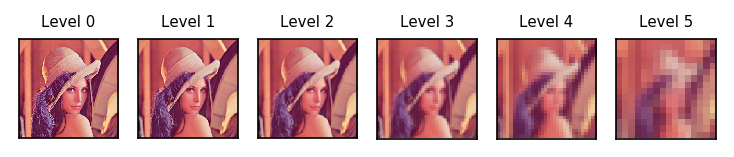

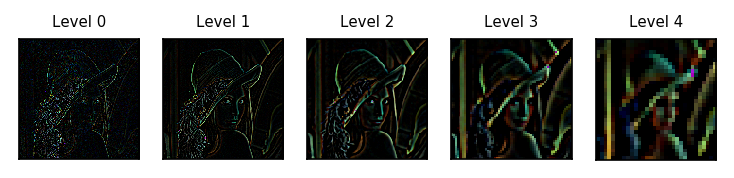

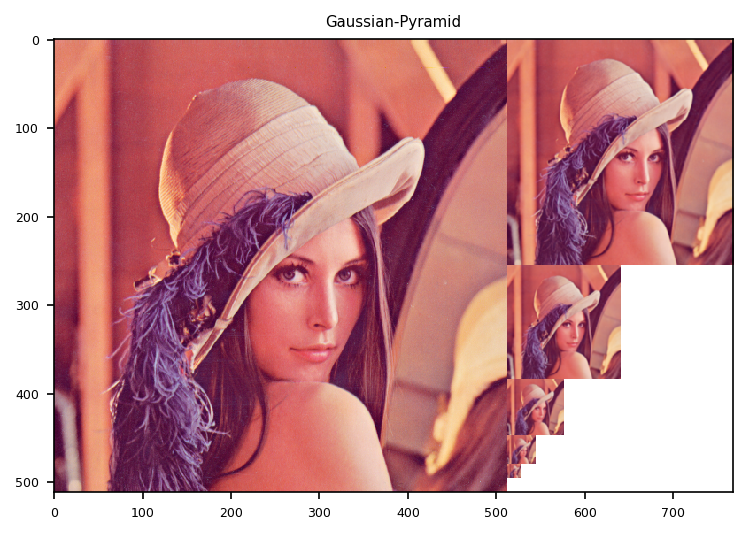

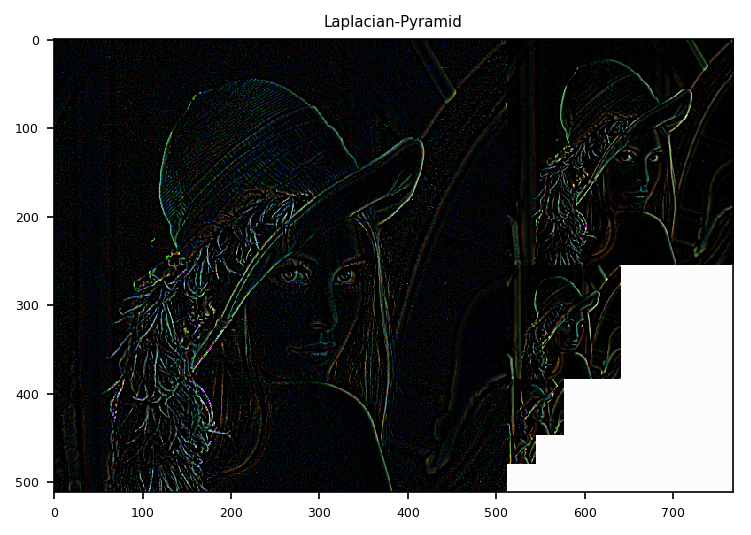

In [19]:
# Load image (512x512)
img = cv2.imread("images/lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate pyramids
levels = 6
gaussianPyramid = getGaussianPyramid(img, levels)
laplacePyramid = getLaplacePyramid(gaussianPyramid)

# Plotting Images
plotList(gaussianPyramid, 'Level')
plotList(laplacePyramid, 'Level', 4)
plotPyramid(gaussianPyramid, 'Gaussian-Pyramid')
plotPyramid(laplacePyramid, 'Laplacian-Pyramid', 4)

Image "gaussianPyramid[x]" can now be reconstructed using the lower resolution "gaussianPyramid[x + 1]" and the laplacian image "laplacePyramid[x]":

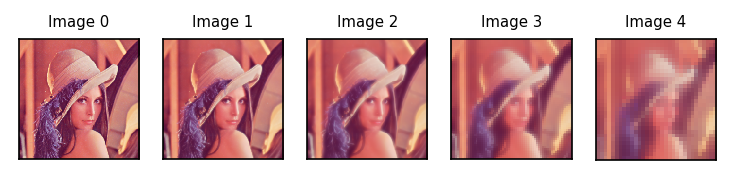

In [20]:
# Reconstruct Images
reconstructedImages = reconstructImages(gaussianPyramid, laplacePyramid)

# Plotting Images
plotList(reconstructedImages, 'Image')